In [1]:
from utils import set_pyplot_params
set_pyplot_params()

# Quote e addizioni

Questo capitolo prensenta un nuovo modo di rappresentare un grado di incertezza, quote e una nuova forma del teorema di Bayes chiamata regola di bayes. La regola di bayes è conveniente se vuoi l'aggiornamento di bayes sulla carta a mano. 

La seconda parte di questo capitolo è relativa agli "addendi", quantità aggiunte, e come calcolare le loro distribuzioni.
Costruiremo funzioni che calcolano la distribuzione delle somme, differenze, prodotti e altre operazioni. 
Poi useremo queste distribuzioni come parte dell'aggiornamento Bayesiano.

## Quote
Un modo per rapprestare una probabilità è con un numero tra 0 e 1, ma questa non è il solo modo.
Se hai mai scommesso su una partita di calcio o ad una corsa ai cavalli avrai probabilmente incontrato un'altra rappresentazione di probabilità chiamata **quote**. 

Avrai certamente sentito l'espressione tièp "le quote sono tree a uno", ma potresti non sapere cosa significhi.
Le **quote a favore** di un evento sono il rapporto di una probabilità, che occorre con la probabilità positive e negative.

Qui la funzione per effettuare il calcolo:

In [2]:
def odds(p):
    return p / (1-p)

Per esempio, se la mia squadra ha il 75% di probabilità di vincere, le quote in favore saranno tre a uno, perchè le possibilità di vincere sono tre volte superiori alle possibilità di perdere.

In [3]:
odds(0.75)

3.0

Possiamo scrivere le quote in forme decimale ma è anche comune scriverle come un rapporto tra interi.
Dunque "tre a uno" è spesso scritto come $3:1$

Quando le probabilità sono basse è più facile scrivere questo come **quote a sfavore** piuttosto che come quote a favore.
Per esempio se il mio cavallo ha il 10% di possibilità di vittoria la quota a favore è $1:9$.

In [4]:
odds(0.1)

0.11111111111111112

Ma nel caso sarebbe più facile usare le quote a sfavore che sono $9:1$.

In [5]:
odds(0.9)

9.000000000000002

Date le quote a favore, nella forma decimale possiamo convertila in probabilità come:

In [6]:
def prob(o):
    return o / (o+1)

Se per esempio abbiamo una quota pari a $3:2$ la corrispondente probabilità sarà:

In [7]:
prob(3/2)

0.6

Oppure se presentiamo le quote con un numeratore e denominatore, possiamo convertire le probabilità in questo modo:

In [8]:
def prob2(yes, no):
    return yes / (yes + no)

In [9]:
prob2(3, 1)

0.75

Probabilità e quote sono rappresentazioni differenti della stessa informazione; data una rappresentazione possiamo calcolare l'altra.

Ma alcuni calcoli sono semplici quando lavoriamo con le quote, come vedremo nella prossima sezione e alcuni calcoli sono ancora più semplici con le quote logaritmiche, come vedremo in seguito.

## Regola di Bayes

Abbiamo lavorato con il teorema di bayes nella forma probabilistica:

$$P(H|D) = \frac{P(H)~P(D|H)}{P(D)}$$

Scrivendo $\mathrm{odds}(A)$ per le quote in favore di $A$, possiamo esprimere il teorema di bayes nella forma delle quote:

$$\mathrm{odds}(A|D) = \mathrm{odds}(A)~\frac{P(D|A)}{P(D|B)}$$

Questa è la regola di Bayes, che ci dice che la quota a posteriori è la quota a priori moltiplicato per il rapporto della verosomiglianza.

La regola di Bayes è conveniente per calcolare l'aggiornamento Bayesiano su carta o a mente. Per esempio torniamo sul problema dei biscotti:

> Supponiamo di avere due ciotole di biscotti. La ciotola 1 contiene 30 biscotti alla vaniglia e 10 al cioccoloato. La ciotola 2 contiene 20 di ciascuno. Supponiamo di scegliere una ciotola a caso e senza guardare di prendere un biscotto.
Il biscotto è alla vaniglia. Qual è la probabilità che venga dalla ciotola 1?

La probabilità a priori è del 50%, dunque la quota a priori è 1. Il rapporto della verosomiglianza è 

$$\frac{3}{4} / \frac{1}{2}$$


Dunque le quote a posteriori darà come risultato $3/2$ che corrisponde alla probabilità di $3/5$.

In [10]:
prior_odds = 1
likelihood_ratio = (3/4) / (1/2)
post_odds = prior_odds * likelihood_ratio
post_odds

1.5

In [11]:
post_prob = prob(post_odds)
post_prob

0.6

Se estraiamo un altro biscotto e otteniamo cioccolata possiamo eseguire l'aggiornamento:

In [12]:
likelihood_ratio = (1/4) / (1/2)
post_odds *= likelihood_ratio
post_odds

0.75

e lo convertiamo in probabilità otteniamo:

In [13]:
post_prob = prob(post_odds)
post_prob

0.42857142857142855

## Il sangue di Oliver

Useremo la regola di bayes per risolvere un'altro problema proposto da MacKay nel libro [*Information Theory, Inference, and Learning Algorithms*](https://www.inference.org.uk/mackay/itila/):

>Due persone hanno lasciato tracce del loro sangue sulla scena di un crimine. Un sospettato Oliver viene fermato e si verifica che il suo gruppo sanguinio è '0'. I due gruppi sanguinei trovati nelle tracce sono di tipo '0' (un tipo comune nella popolazione locale, che ha una frequenza del 60%) e un tipo 'AB' (un raro tipo con la frequenza dell 1%). Questi dati \[le tracce trovate sulla scena\] danno l'evidenza in favore  della proposta che Oliver fosse una delle persone \[che hanno lasciato il sangue sulla scena\]?


Per rispondere alla questione, dobbiamo pensare circa il significato dei dati di dare evidenza in favore o contro l'ipotesi.
Intuitivamente, possiamo dire che il dato è a favore delle ipotesi se le ipotesi sono più probabili alla luce dei dati rispetto a prima. 

Nel problema dei biscotti visto prima, le quote a priori sono 1. che corrisponde ad una probabilità del 50%. Le quote a posteriori sono $3/2$, o la probabilità è del 60%. Dunque il biscotto alla vaniglia è una evidenza in favore alla ciotola 1.

La regola di Bayes ci da una vita per rendere questa intuizione più precisi. Ancora 
$$\mathrm{odds}(A|D) = \mathrm{odds}(A)~\frac{P(D|A)}{P(D|B)}$$

Dividere per $\mathrm{odds}(A)$ otteniamo:
$$\frac{\mathrm{odds}(A|D)}{\mathrm{odds}(A)} = \frac{P(D|A)}{P(D|B)}$$

Il termine sulla sinistra è il rapporto tra le quote a posteriori e priori. Il termine sulla destra è il rapporto tra le verosomiglianze anche chiamato **Fattore di Bayes**.

Se il fattore di Bayes è minore di 1 significa che il dato è meno probabile sotto $A$ piuttosto che sotto $B$, dunque le quote in favore di $A$ scendono.


Finalmente, se il fattore di Bayes è esattamente 1 il dato è egualmente probabile sotto ogni ipotesi, dunque la quota non cambia.

Applichiamolo al problema appena visto. Se Oliver è una delle persone che ha lasciato il sangue sulla scena del crimine, rappresenta il campione '0', in questo caso la probabilità del dato è la probabilità che un membro della popolazione scelto a caso abbia il tipo ‘AB’ che rappresenta l'1%.

Se Oliver non ha lasciato il sangue sulla scena abbiamo due campioni di cui tener conto.

Se scegliamo due persone a caso dalla popolazione, qual'è la probabilità di trovarne uan con il tipo '0' e una con il tipo 'AB'?

Bene ci sono sue cose che possono accadere:

* La prima persona può avere il gruppo '0' e il secondo 'AB',
* Oppure la prima persona può avere il gruppo 'AB' e il secondo '0'.

La probabilità di entrambe le combinazioni sono $(0.6) (0.01)$, che rappresenta il 0.6%, perciò la probabilità è doppia 1.2%.
Quindi i dati sono un pò più probabilit se Oliver *non* è una delle persone che hanno lasciato il sangue sulla scena.

Possiamo usare queste probabilità per calcolare il rapporto delle verosomiglianze:

In [14]:
like1 = 0.01
like2 = 2 * 0.6 * 0.01

likelihood_ratio = like1 / like2
likelihood_ratio

0.8333333333333334

Visto che il rapporto delle verosomiglianze è minore di 1, il test del sangue contro le ipotesi contro le opitesi che Oliver abbia lasciato traccie del suo sangue sulla scena.

Ma questa è una evidenza debole. Per esempio se il rapporto a priori era 1 (che rappresenta il 50% della probabilità) la probabilità a posteriori sarà 0.83 che corrisponde al 45%:

In [15]:
post_odds = 1 * likelihood_ratio
prob(post_odds)

0.45454545454545453

Dunque questa evidenza non muove la bilancia dalla nostra parte.

Questo esempio è un pochino forzato, ma ci dimostra che il risultato controintuitivo del dato *consistente* con ipotesi che non sono a *favore* delle ipotesi.

Se questo risultato non ti soddisfa, questo modo di pensare potrebbe aiutarti:

Il dato consiste in un evento comune gruppo '0' e un raro evento gruppo 'AB'.
Se Oliver spiega l'evento comune , questo lascia l'evento raro non spiegato.

Se Oliver non spiega il gruppo '0', abbiamo due possibilità di trovare nella popolazione il gruppo 'AB'.
E' quel fattore due a fare la differenza.

**Esercizio:** Supponiamo che basandosi sulla nostra evidenza, la nostra credenza a priori che Oliver sia colpevole è del 90%.
Quanto la nostra evidenza relativa al gruppo sanguineo può cambiare le nostre credenze? Ese inizialmente pensassi che c'è solo il 10% di possibilità che sia colpevole?.

In [16]:
post_odds = odds(0.9) * likelihood_ratio
prob(post_odds)

0.8823529411764706

In [17]:
post_odds = odds(0.1) * likelihood_ratio
prob(post_odds)

0.08474576271186442

# Addizioni

La seconda metà di questo capitolo è relativa alle distribuzioni di somme e i risultati di altre operazioni.
Partiremo con un problema in cui dati gli input calcoleremo la distribuzione del risultato.
Passeremo poi al problema inversom dato l'output calcoleremo la distribuzione degli input.

Come primo esempio, supponiamo di lanciare due dadi e di sommare il risultato. Quale sarà la distribuzione della somma?
Usiamo la seguente funzione per creare un `Pmf` che rappresenti i possibili risultati dei dadi:

In [18]:
import numpy as np
from distribution import Pmf

def make_die(sides):
    outcomes = np.arange(1, sides+1)
    die = Pmf(1/sides, outcomes)
    return die

In un dado a sei facce i risultati possono avere un valore tra 1 e 6 tutti con la stessa probabilità.

In [19]:
die = make_die(6)

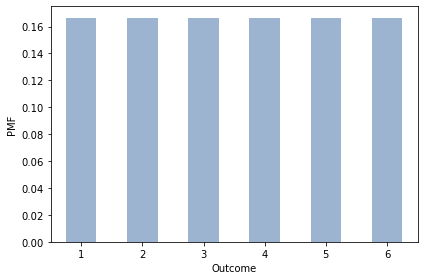

In [20]:
from utils import decorate

die.bar(alpha=0.4)
decorate(xlabel='Outcome',
         ylabel='PMF')

Se lanciamo due volte il dado e sommiamo il risultato otterremo 11 risultati possibili che vanno dal 2 al 12 ma non tutti con la stessa probabilità.

Per calcolare la distribuzione della somma dobbiamo enumerare tutti i possibili risultati.
Ed è quello che fa la seguente funzione:

In [21]:
def add_dist(pmf1, pmf2):
    """Compute the distribution of a sum."""
    res = Pmf()
    for q1, p1 in pmf1.items():
        for q2, p2 in pmf2.items():
            q = q1 + q2
            p = p1 * p2
            res[q] = res(q) + p
    return res

la parte più interessante della funzione è il pezzo di codice:

```
            res[q] = res(q) + p
```

`res(q)` restituisce 0 se l'elemento `q` non esiste nella distribuzione, `res[q]` poi viene usato nella parte a sinistra per aggiornare la distribuzione.

L'oggetto `Pmf` ha anche la funzione `add_dist` che fa esattamente la stessa cosa possiamo usarla in questo modo:


```
            twice = die.add_dist(die)
```

vediamo invece il risultato della somma dei due dadi:

In [22]:
from utils import decorate

def decorate_dice(title=''):
    decorate(xlabel='Outcome',
             ylabel='PMF',
             title=title)

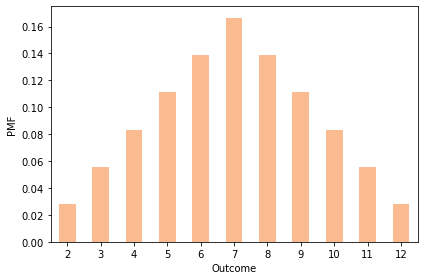

In [23]:
twice = add_dist(die, die)
twice.bar(color='C1', alpha=0.5)
decorate_dice()

Se hai una sequenza di `Pmf` che rappresentano un dado possiamo calcolare la somma della distristribuzione in questo modo:

In [24]:
def add_dist_seq(seq):
    """Compute Pmf of the sum of values from seq."""
    total = seq[0]
    for other in seq[1:]:
        total = total.add_dist(other)
    return total

ad esempio se i dadi sono 3 possiamo calcola la distribuzione della somma come:

In [25]:
dice = [die] * 3
thrice = add_dist_seq(dice)

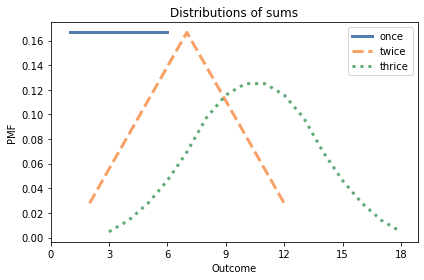

In [26]:
import matplotlib.pyplot as plt

die.plot(label='once')
twice.plot(label='twice', style='--')
thrice.plot(label='thrice', style=':')

plt.xticks([0,3,6,9,12,15,18])
decorate_dice(title='Distributions of sums')

Come precisazione, questo dimostra anche il teorema del limite centrale, che dice che sotto alcune condizioni la somma delle destribuzioni converge verso una distribuzione normale. 

## Sensibilità al glutine

Nel 2015 è uscito uno studio dove si testava se le persone a cui veniva diagnosticata una sensibilità al glutine (ma non una celiachia) fossero capaci di distinguere la farina con il glutine da quella senza glutine in un test cieco ([qui lo studio](https://onlinelibrary.wiley.com/doi/full/10.1111/apt.13372)).

Su 35 soggetti, 12 hanno identificato correttamente la farina con il glutine basandosi sui sintomi mentre la stavano mangiando.
Gli altri 17 hanno sbagliato l'identificazione basandosi sui loro sintomi e 6 non furono in grado di distunguerle.

Gli autori conclusero: "Il test in doppio cieco induce i sintomi ricorrenti solo in un terzo dei pazienti".

Questa conclusione sembra strana, perchè se nessuno dei pazienti era sensibile al glutine ci aspetteremmo che qualcuno di essi identifichi la farina con il glutine correttamente per caso.

E qui parte la domanda: basandosi su questo dato, quanti soggetti sono sensibili al glutine e quanti hanno solo indovinato?

Possiamo usare il teorema di Bayes per rispondere a questa domanda, ma prima dobbiamo fare alcuno decisioni di modellazione.
Assumeremo che:

* Le persone che sono sensibili al glutine hanno il 95% di possibilità di identificare correttamente la farina con il glutine sotto le condizioni del test e

* Le persone che non sono sensibili al glutine hanno il 40% di possibilità di identificare la farina con il glutine per caso ( e il 60% di possibilità di scegliere l'altra farina e di fallire).

Questi valori sono arbitrari, ma i risultati non sono sensibili a questa scelta.

Risolveremo questo problema in due passi, Primo assumendo di conoscere quanti soggetti sono sensibili, calcoleremo la distribuzione del dato.

Poi usando la verosomiglianza del dato, calcoleremo la distribuzione a posteriori del numero dei pazienti sensibili.

Il primo è il problema in **avanti**, il secondo è il **problema inverso**.

## Problema in avanti

Supponiamo di conoscere che 10 delle 35 persone sono sensibili al glutine. Questo significa che 25 non lo sono:

In [27]:
n = 35
num_sensitive = 10
num_insensitive = n - num_sensitive

Ogni soggetto sensibile ha il 95% di possibilità di identificare la farina con il glutine, dunque il numero di classificazioni corrette segue la distrbuzione binomiale.

Usiamo la funzione `make_binomial` per creare un oggetto `Pmf` corretto.

In [28]:
from distribution import make_binomial

In [29]:
dist_sensitive = make_binomial(num_sensitive, 0.95)
dist_insensitive = make_binomial(num_insensitive, 0.40)

I risultati sono le distribuzioni del numero delle corrette identificazioni in ogni gruppo.
Ora possiamo usare `add_dist` per calcolare la distribuzione del numero totale delle identificazioni corrette:

In [30]:
dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive)

Qui i risultati

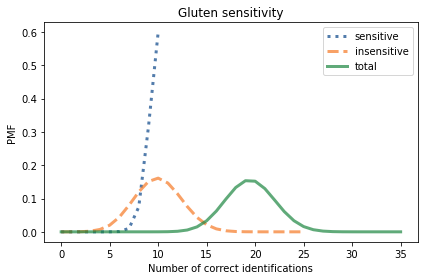

In [31]:
dist_sensitive.plot(label='sensitive', style=':')
dist_insensitive.plot(label='insensitive', style='--')
dist_total.plot(label='total')

decorate(xlabel='Number of correct identifications',
         ylabel='PMF',
         title='Gluten sensitivity')

Ci aspettiamo che molte delle persone sensibili al glutine identifichino correttamente la farina con il glutine.
Su 25 soggetti non sensibili, ci aspettiamo che 10 riescano ad identificare la farina con il glutine per caso.
Dunque ci aspettiamo 20 identificazioni corrette nel totale.

Questa è la risposta del problema in avanti: dato il numero delle persone sensibili al glutine possiamo calcolare la distribuzione del dato.

## Il problema inverso

Risolviamo ora il problema inverso: dato il dato, calcoliamo la distribuzione a posteriori del numero delle persone sensibili al glutine.

Ecco qui come. Analizzeremo i possibili valori di `num_sensitive` e calcoleremo la distribuzione del dato per ognuno di essi:

In [32]:
import pandas as pd

table = pd.DataFrame()
for num_sensitive in range(0, n+1):
    num_insensitive = n - num_sensitive
    dist_sensitive = make_binomial(num_sensitive, 0.95)
    dist_insensitive = make_binomial(num_insensitive, 0.4)
    dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive)    
    table[num_sensitive] = dist_total

Il ciclo enumera i possibili valori di `num_sensitive`.
Per ogni valore, calcoliamo la distribuzione del numero totale delle identificazione corrette e salva il risultato nella colonna del `DataFrame`.

In [33]:
table.head(3)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.719071e-08,1.432559e-09,1.193799e-10,9.948326e-12,8.290272e-13,6.908560e-14,5.757133e-15,4.797611e-16,3.998009e-17,3.331674e-18,...,1.501694e-36,1.251411e-37,1.042843e-38,8.690357e-40,7.241964e-41,6.034970e-42,5.029142e-43,4.190952e-44,3.492460e-45,2.910383e-46
1,4.011165e-07,5.968996e-08,7.162795e-09,7.792856e-10,8.013930e-11,7.944844e-12,7.676178e-13,7.276377e-14,6.796616e-15,6.274653e-16,...,7.508469e-34,6.486483e-35,5.596590e-36,4.823148e-37,4.152060e-38,3.570691e-39,3.067777e-40,2.633315e-41,2.258457e-42,1.935405e-43
2,4.545987e-06,9.741401e-07,1.709122e-07,2.506426e-08,3.269131e-09,3.940182e-10,4.490244e-11,4.908756e-12,5.197412e-13,5.365476e-14,...,1.806613e-31,1.620070e-32,1.449030e-33,1.292922e-34,1.151034e-35,1.022555e-36,9.066202e-38,8.023344e-39,7.088005e-40,6.251357e-41


La figura seguente mostra le colonne selezionate dal `DataFrame`, corrispondenti alle differenti ipotesi del valore `num_sensitive`:

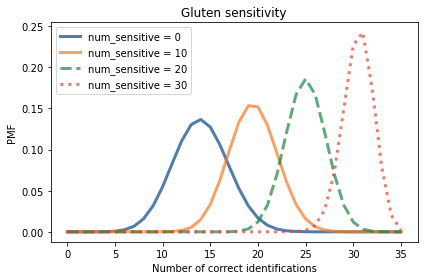

In [34]:
table[0].plot(label='num_sensitive = 0')
table[10].plot(label='num_sensitive = 10')
table[20].plot(label='num_sensitive = 20', style='--')
table[30].plot(label='num_sensitive = 30', style=':')
    
decorate(xlabel='Number of correct identifications',
         ylabel='PMF',
         title='Gluten sensitivity')

Possiamo usare questa tabella per calcolare la verosomiglianza del dato:

In [35]:
likelihood1 = table.loc[12]

`loc` seleziona la riga del `DataFrame`.

La riga con l'indice 12 contiene le probabilità di 12 identificazioni correte per ogni ipotetico valore di `num_sensitive`.
E questo è quello che la verosomiglianza di cui abbiamo bisogno per eseguire l'aggiornamento Bayesiano.
Useremo la distribuzione a priori uniforme, che implica che ogni valore di `num_sensitive` ha la stessa probabilità:

In [36]:
hypos = np.arange(n+1)
prior = Pmf(1, hypos)

E qui l'aggiornamento:

In [37]:
posterior1 = prior * likelihood1
posterior1.normalize()

0.4754741648615132

Per comparazione, ho anche calcolato la distribuzione a posteriori per un altro possibile valore di 20 identificazioni corrette.

In [38]:
likelihood2 = table.loc[20]
posterior2 = prior * likelihood2
posterior2.normalize()

1.7818649765887375

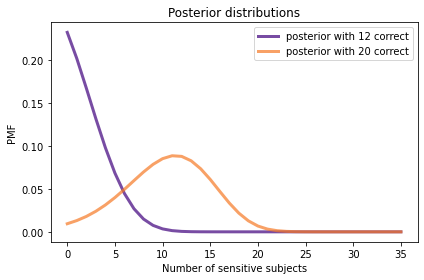

In [39]:
posterior1.plot(label='posterior with 12 correct', color='C4')
posterior2.plot(label='posterior with 20 correct', color='C1')

decorate(xlabel='Number of sensitive subjects',
         ylabel='PMF',
         title='Posterior distributions')

Con 12 corrette identificazioni, il valore più probabile è che nessuno sia sensibile al glutine.
Mentre con 20 identificazioni corrette, la conclusione potrebbe essere che 11-12 soggetti siano sensibili.

In [40]:
posterior1.max_prob()

0

In [41]:
posterior1.credible_interval(0.9)

array([0., 7.])

In [42]:
posterior2.max_prob()

11

In [43]:
posterior2.credible_interval(0.9)

array([ 3., 17.])

## Sommario
Questo capitolo rappresenta due argomenti che solo per lo più non correlati tra loro.
La prima parte del capitolo è relativo alla regola di Bayes e come come quantificare la forza dell'evidenza usando il rapporto delle verosomiglianze o il fattore di Bayes.

La seconda parte è relativa a `add_dist`, che calcola la distribuzione della somma.
Possiamo usare questa funzione per risolvere il problema inverso, dati i parametri del sistema possiamo calcolare la distribuzione del dato o dato il dato possiamo calcolare la distribuzione dei parametri.

Nel prossimo capitolo, calcoleremo distribuzioni per minimi e massimi e le useremo per risolvere problemi Bayesiani.


## Esercizi

**Esercizio:** Usiamo la regola di Bayes per risolvere il problema del gemello di Elvis:
> Elvis Presley aveva un fratello gemello che è morto alla nascita.Quale è la probabilità che Elvis fosse un gemello identico ?

Nel 1935 circa 2/3 dei gemelli erano eterozigoti e 1/3 erano identici.
La domanda contiene due pezzi di informazione che possiamo usare per aggiornare i dati.
* Primo, Il gemello di Elvis era che lui maschio che è più probabile se fossero gemelli identici con un rapporto di verosomiglianza pari a 2.

* Ancora, il gemello di Elvis è morto alla nascita che è più probabile se erano gemelli identici, con un rapporto di verosomiglianza pari a 1.25.

Se siete curiosi circa questi numeri leggete questo [articolo](https://www.allendowney.com/blog/2020/01/28/the-elvis-problem-revisited).

In [48]:
prior = odds(1/3)
prior

0.49999999999999994

In [49]:
likelihood = 1.25 * 2
likelihood

2.5

In [50]:
post_odd = prior * likelihood
post_odd

1.2499999999999998

In [51]:
prob(post_odd)

0.5555555555555555

**Esercizio:** La seguente è una domanda nella [intervista che è apparsa su glassdoor.com](https://www.glassdoor.com/Interview/You-re-about-to-get-on-a-plane-to-Seattle-You-want-to-know-if-you-should-bring-an-umbrella-You-call-3-random-friends-of-y-QTN_519262.htm) attribuita a Facebook:

> Stai per prendere un aereo per Seattle. Vuoi conoscere se devi prendere una ombrella. Chiamiamo 3 amici a caso che vivono li e chiediamo indipendentemente se sta piovendo. Ogni tuo amico ha 2/3 di possibilità di dirti la verità e circa un 1/3 di possibilità di prenderti in giro mentendo. Tutti e tre i tuoi amici ti dicono che sta piovendo. Quale è la probabilità che stia piovendo a Seattle ?

Usa la regola di Bayes per risolvere questo problema. Come priori assumiamo che a Seattle piova circa il 10% del tempo.
Questa domanda causa alcune confusioni circa le differenze tra l'interpretazione Bayesiana e frequentista della probabilità, se sei curioso circa questo punto possiamo leggere [questo articolo](http://allendowney.blogspot.com/2016/09/bayess-theorem-is-not-optional.html).

In [80]:
prior_odds = odds(0.1)
prior_odds

0.11111111111111112

In [81]:
likelihood = pow(odds(2/3),3)
likelihood

7.999999999999997

In [82]:
post_odds = prior_odds * likelihood
post_odds

0.8888888888888886

In [83]:
prob(post_odds)

0.4705882352941176

**Esercizio:** [In accordo con il CDC](https://www.cdc.gov/tobacco/data_statistics/fact_sheets/health_effects/effects_cig_smoking) le persone che fumano hanno 25 volte in più di probabilità di sviluppare il cancro ai polmoni dei non fumatori.
[Sempre in accordo con il CDC](https://www.cdc.gov/tobacco/data_statistics/fact_sheets/adult_data/cig_smoking/index.htm) circa il 14% degli adulti negli stati uniti sono fumatori. Se sai che una persona ha il cancro ai polmoni quale è la probabilità che sia un fumatore ?

In [85]:
prior_odds = odds(0.14)
prior_odds

0.16279069767441862

In [86]:
post_odds = prior_odds * 25
post_odds

4.069767441860465

In [87]:
prob(post_odds)

0.8027522935779816

**Esercizio:** In *Dungeons & Dragons*, l'ammontare dei danni che un goblin può supportare è la somma di dadi a sei facce. La somma dei danni che puoi infliggere con una spada corta è determinato dal lancio di un dado a sei facce.
Un goblin è sconfitto se il totale dei danno inflitti è maggiore o uguale alla quantità che può supportare.

Supponiamo che tu stia combattendo un goblin e che tu abbia già inflitto 3 punti di danni. Quale è la probabilità di sconfiggere il goblin con l'attacco successivo?

Suggerimento: possiamo usare `Pmf.add_dist` per aggiungere una quantità costante tipo 3 a `Pmf` e `Pmf.sub_dist` per calcolare la distribuzione dei punti rimanenti.

In [88]:
d6 = make_die(6)
d6

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In [89]:
hp_before = Pmf.add_dist(d6, d6)
hp_before

,probs
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


In [121]:
# Questo è il numero dei punti dopo il primo attacco
hp_after = Pmf.sub_dist(hp_before, 3)
hp_after

,probs
-1,0.027778
0,0.055556
1,0.083333
2,0.111111
3,0.138889
4,0.166667
5,0.138889
6,0.111111
7,0.083333
8,0.055556


In [122]:
# Ma i valori -1 e 0 non sono possibili, in quanto il goblin sarebbe già stato sconfitto.
# Dunque dobbiamo azzerare questa casistica e rinormalizzare
hp_after[hp_after.index <= 0] = 0
hp_after.normalize()
hp_after

,probs
-1,0.000000
0,0.000000
1,0.090909
2,0.121212
3,0.151515
4,0.181818
5,0.151515
6,0.121212
7,0.090909
8,0.060606


In [123]:
# il danno del secondo attacco sarà uno dei seguenti casi
damage = d6

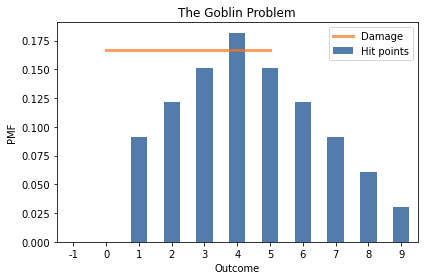

In [124]:
# qui come la distribuzione come sembra
hp_after.bar(label='Hit points')
damage.plot(label='Damage', color='C1')
decorate_dice('The Goblin Problem')

In [125]:
# Qui la distribuzione dei punti dopo aver lasciato il goblin
points_left = Pmf.sub_dist(hp_after, damage)

In [126]:
# e qui la probabilità che il ghoblin sia morto
points_left.le_dist(0)

0.4545454545454545

**Esercizio:** Supponiamo di avere una scatola con un dado a 6 facce, uno a 8 facce e uno a 12 facce.
Scegliamo un dado a caso, lanciamo il dado due volte, moltiplichiamo i risultati e riportiamo che il prodotto è 12.

Quale è la probabilita di aver scelto un dato a 8 facce?

Suggerimento: L'oggetto `Pmf` è una funzione chiamata `mul_dist` che prende due oggetti `Pmf` e ritorna un oggetto `Pmf` che rappresenta la distribuzione del prodotto.

In [128]:
hypos = [6, 8, 12]
prior = Pmf(1, hypos)
prior

,probs
6,1
8,1
12,1


In [135]:
d4 = make_die(4)
Pmf.mul_dist(d4, d4)

,probs
1,0.0625
2,0.1250
3,0.1250
4,0.1875
6,0.1250
8,0.1250
9,0.0625
12,0.1250
16,0.0625


In [136]:
# qui la funzione di credibilità dopo aver fatto la moltiplicazione
likelihood = []

for sides in hypos:
    die = make_die(sides)
    pmf = Pmf.mul_dist(die, die)
    likelihood.append(pmf[12])
    
likelihood

[0.1111111111111111, 0.0625, 0.041666666666666664]

In [137]:
# E qui l'aggiornamento
posterior = prior * likelihood
posterior.normalize()
posterior

,probs
6,0.516129
8,0.290323
12,0.193548
